In [0]:
# table of contents

# 1. PCA on digits for visualization
# 2. PCA on digits for compression
# 3. PCA on digits in a simple classificaiton
# 4. Grid search cross validation for hyperparameters in three ML classifiers

import numpy as np
import pylab as py

%matplotlib inline

In [0]:
# digit recognition setup

from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


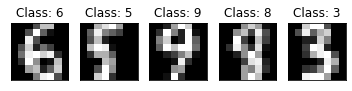

In [0]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        py.subplot(1, data.shape[0], (i + 1))
        py.imshow(data[i].reshape(shape), interpolation=interpolation)
        py.title(labels[i])
        py.xticks(()), py.yticks(())
        py.gray()

subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['Class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8, 8))

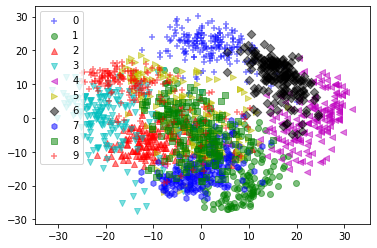

In [0]:
# 1. PCA on digits for visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

X_pca.shape

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    py.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
        c=c, marker=m, label=i, alpha=0.5)

_ = py.legend(loc='best')

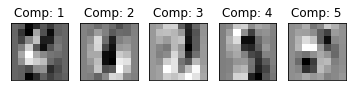

In [0]:
labels = ['Comp: %d' % (i+1) for i in range(len(pca.components_)) ]
plot_gallery(pca.components_, labels, shape=(8, 8))

compressed images of first 8 digits
with this many PCA components: [1, 2, 3, 5, 10, 20, 40, 64]


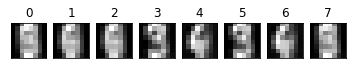

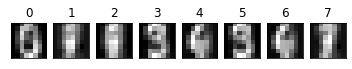

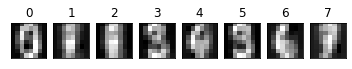

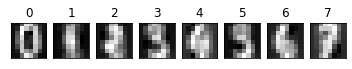

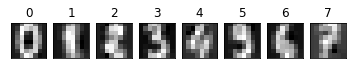

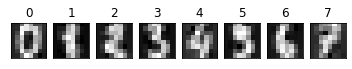

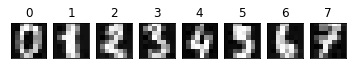

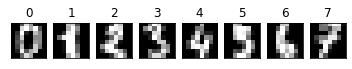

In [0]:
# 2. PCA on digits for compression

n = 8 # number of digits for demonstration
dims = [1,2,3,5,10,20,40,64]
print('compressed images of first',n,'digits')
print('with this many PCA components:',dims)
for d in dims:  # dimensionality for compressed signal
    pca = PCA(n_components=d)
    pca.fit_transform(X)
    reduced_X = pca.transform(X[0:n]) # the reduced dimensionality
    recovered_X = pca.inverse_transform(reduced_X)
    py.figure()
    plot_gallery(recovered_X, y[0:n], shape=(8, 8))

In [0]:
# 3. PCA on digits improve classification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))
print("test data shape: %r, test target shape: %r"
      % (X_test.shape, y_test.shape))

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)
train_score = model.score(X_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(X_test, y_test)
print('test score:',test_score)

train data shape: (898, 64), train target shape: (898,)
test data shape: (899, 64), test target shape: (899,)
training score (overfitting!): 0.8752783964365256
test score: 0.8342602892102335


In [0]:
# but now using PCA features instead of pixels directly!

pca = PCA(n_components=10)
pca.fit(X_train)

tX_train = pca.transform(X_train)
tX_test = pca.transform(X_test)

model = GaussianNB().fit(tX_train, y_train)
train_score = model.score(tX_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(tX_test, y_test)
print('test score:',test_score)

from sklearn import metrics
y_test_pred = model.predict(tX_test)
expected = y_test
predicted = model.predict(tX_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

training score (overfitting!): 0.9164810690423163
test score: 0.9154616240266963
Confusion matrix:
[[89  0  0  0  0  0  0  0  0  0]
 [ 0 85  2  0  0  0  0  0  2  1]
 [ 0  7 83  1  0  0  0  1  0  0]
 [ 0  0  2 79  0  4  0  2  2  4]
 [ 0  1  0  0 71  0  0  4  0  0]
 [ 0  0  0  0  1 98  0  0  0  9]
 [ 0  2  0  0  0  0 84  0  2  1]
 [ 0  1  0  0  0  0  0 77  0  0]
 [ 0 13  0  1  0  1  0  1 72  4]
 [ 0  1  0  1  0  3  0  2  0 85]]


Text(0, 0.5, 'digit recognition accuracy')

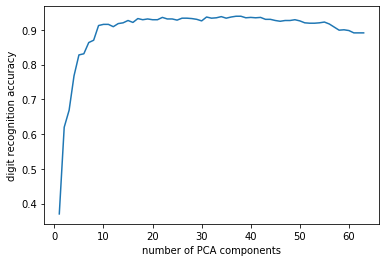

In [0]:
# let's plot accuracy vs number of components!

accuracy = []
n_comp = range(1,64)
for i in n_comp:
    pca = PCA(n_components=i)
    pca.fit(X_train)

    tX_train = pca.transform(X_train)
    tX_test = pca.transform(X_test)

    model = GaussianNB().fit(tX_train, y_train)
    test_score = model.score(tX_test, y_test)
    accuracy.append(test_score)

py.plot(n_comp, accuracy)
py.xlabel('number of PCA components')
py.ylabel('digit recognition accuracy')

In [0]:
#4. Grid search cross validation for hyperparameters in three ML classifiers
#   For each model grid search is used to generate set of hyperparameters to test
#   then cross validation is used to evaluate the hyperparemeters
#   the best model hyperparameters from cross validation are then used
#   to predict a hold-out test set

import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

final = [[""]*4 for i in range(3)]
# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
expected = digits.target
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, expected, test_size=0.40)

In [0]:
#k-NN
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':list(range(1,10))}
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5)
default_train=np.mean(scores)

clf=GridSearchCV(knn, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
nn=clf.best_estimator_.n_neighbors

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[0][0]=str(default_train)
final[0][1]=str(best_train)
final[0][2]="n_neighbors: "+str(nn)
final[0][3]=str(best_test)

In [0]:
#Decision Tree
from sklearn import tree
DT=tree.DecisionTreeClassifier()
scores=cross_val_score(DT, X_train, y_train, cv=5)
default_train=np.mean(scores)

parameters={'min_samples_split':list(range(2,10))}
clf=GridSearchCV(DT, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
min_samples=clf.best_estimator_.min_samples_split

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[1][0]=str(default_train)
final[1][1]=str(best_train)
final[1][2]="min_samples: "+str(min_samples)
final[1][3]=str(best_test)

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression(penalty='l1', solver='saga', tol=0.01)
scores=cross_val_score(regression, X_train, y_train, cv=5)
default_train=np.mean(scores)

parameters={'C':[10**(i-4) for i in range(9)]}
clf=GridSearchCV(regression, parameters, cv=5,scoring="accuracy",iid=False)
clf.fit(X_train,y_train)
best_train=clf.best_score_
C=clf.best_estimator_.C

y_pred = clf.predict(X_test) # runs the model with the best score
best_test=metrics.accuracy_score(y_test,y_pred)

final[2][0]=str(default_train)
final[2][1]=str(best_train)
final[2][2]="C: "+str(C)
final[2][3]=str(best_test)

In [0]:
left=["K-nearest neighbors: ","Decision Trees:      ","Logistic Regression: "]
print("Model                "," Default Accuracy","Tuned Valid. Acc.",
 " Hyperparameters ","  Test Set Acc. ",sep="|",end="|\n")
for i in range(50):
 print("_",end="_")
print("")
for i in range(3):
 print(left[i],end="|")
 for j in range(4):
   print('{:>17.15}'.format(final[i][j]),end="|")
 print("")

Model                | Default Accuracy|Tuned Valid. Acc.| Hyperparameters |  Test Set Acc. |
____________________________________________________________________________________________________
K-nearest neighbors: |  0.9851593453919|  0.9851593453919|   n_neighbors: 3|  0.9791376912378|
Decision Trees:      |  0.8312144702842|  0.8506976744186|   min_samples: 3|  0.8358831710709|
Logistic Regression: |  0.9656804478897|  0.9666106804478|            C: 10|  0.9680111265646|
